# Notebook Imports

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

# Gather Data
[Source](https://youtube.com/)

In [3]:
 boston_dataset = load_boston()

In [4]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [6]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Datapoints and features

In [7]:
type( boston_dataset.data)

numpy.ndarray

In [8]:
boston_dataset.data.shape

(506, 13)

In [9]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

# Data exploration with Pandas dataframes

In [10]:
#create a pandas dataframe
data = pd.DataFrame(data= boston_dataset.data, columns = boston_dataset.feature_names)

#add coloumn with price
data[ 'PRICE' ] = boston_dataset.target


In [11]:
data['CRIM'].max()

88.9762

## Cleaning data- check for missing values

In [12]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


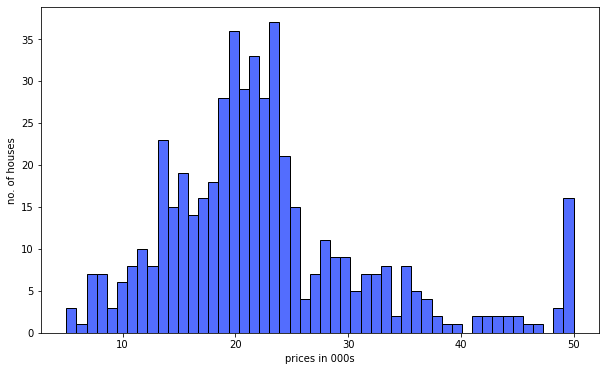

In [14]:
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'],bins =50, ec='black', color='#536dfe') #ec= edge color
plt.xlabel('prices in 000s')
plt.ylabel('no. of houses')
plt.show()

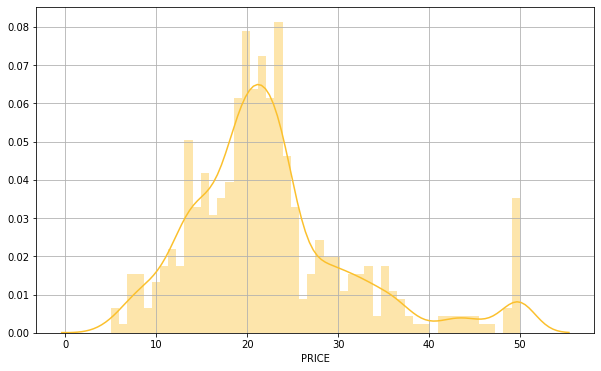

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(data['PRICE'], bins=50, color='#fbc02d')
plt.grid('darkgrid')
plt.show()

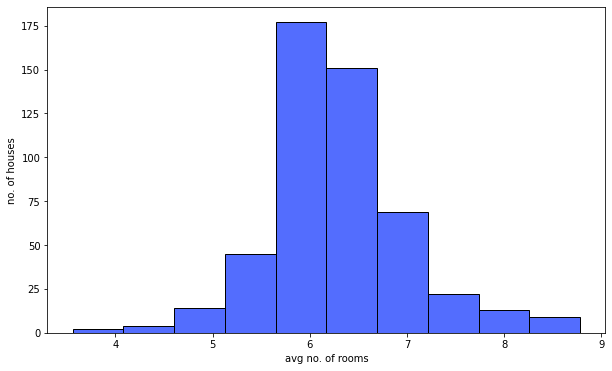

In [16]:
plt.figure(figsize=(10,6))
plt.hist(data['RM'], ec='black', color='#536dfe') #ec= edge color
plt.xlabel('avg no. of rooms')
plt.ylabel('no. of houses')
plt.show()

In [17]:
data['RM'].mean()

6.284634387351787

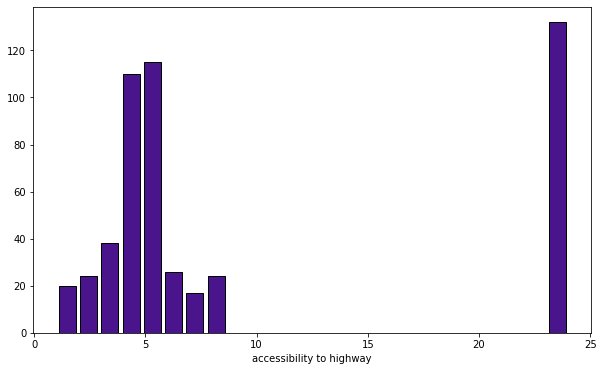

In [18]:
plt.figure(figsize=(10,6))

plt.hist(data['RAD'],bins= 24,ec='black',color='#4a148c', rwidth=0.8)

plt.xlabel('accessibility to highway')
plt.show()

In [19]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

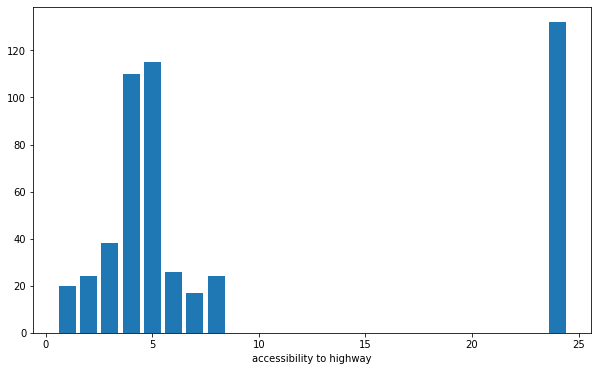

In [20]:
frequency = data['RAD'].value_counts()
plt.figure(figsize=(10,6))
plt.xlabel('accessibility to highway')
plt.bar(frequency.index, height=frequency)
plt.show()


# Descripted Statistics 

In [21]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [22]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [23]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [24]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [25]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

## $$\rho_{XY} = corr(X,Y)$$
## $$-1.0\leq \rho_{XY}\leq +1.0 $$

In [26]:
data['PRICE'].corr(data['RM'])

0.695359947071539

In [27]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375615

In [28]:
data.corr() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [29]:
mask1 = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask1)
mask1[triangle_indices] = True
mask1

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

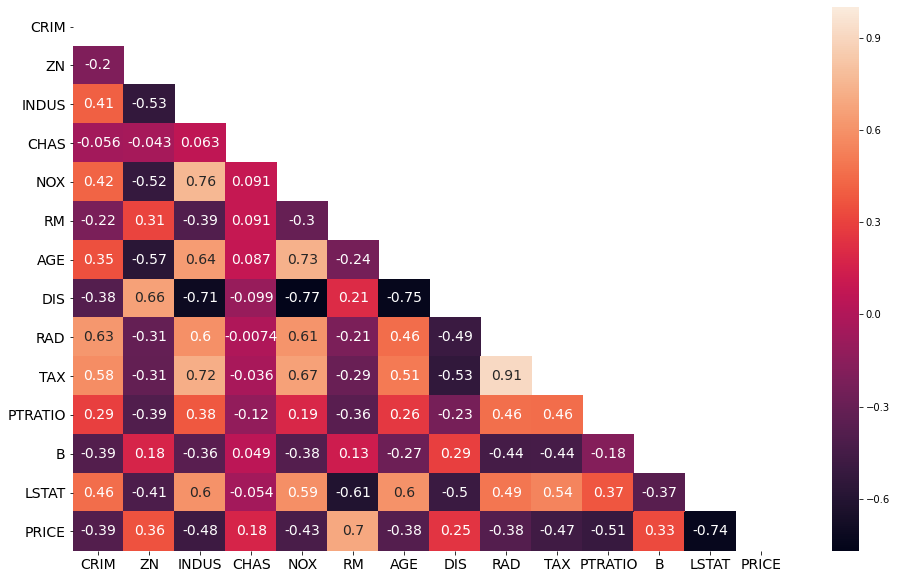

In [30]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),mask=mask1, annot =True, annot_kws={'size':14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

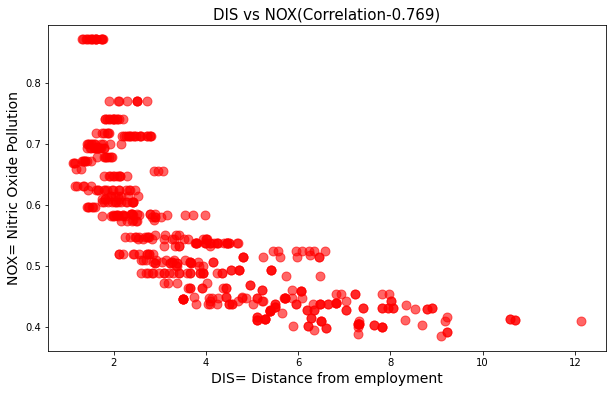

In [31]:
nox_dis_corr = round(data['NOX'].corr(data['DIS']),3)

plt.figure(figsize=(10,6))
plt.scatter(data['DIS'], data['NOX'], color='red', alpha = 0.6,s=80)
plt.title(f'DIS vs NOX(Correlation{nox_dis_corr})', fontsize=15)
plt.xlabel("DIS= Distance from employment", fontsize=14)
plt.ylabel("NOX= Nitric Oxide Pollution", fontsize=14)
plt.show()

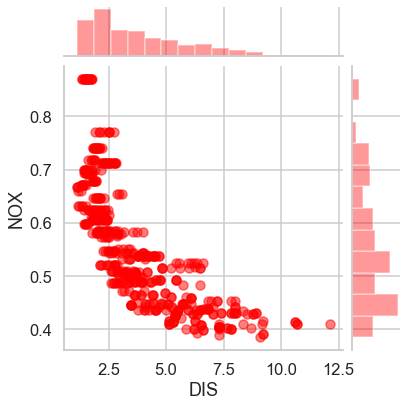

In [32]:
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.jointplot(data['DIS'], data['NOX'], color='red', joint_kws={'alpha':0.5},)
plt.show()

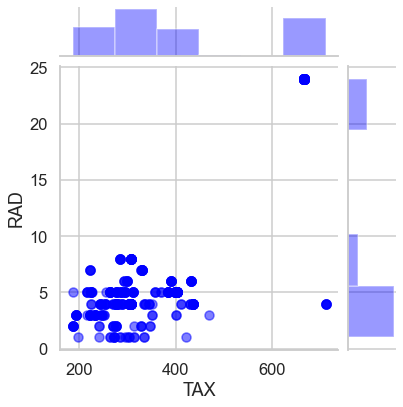

In [33]:
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.jointplot(data['TAX'], data['RAD'], color='blue', joint_kws={'alpha':0.5},)
plt.show()

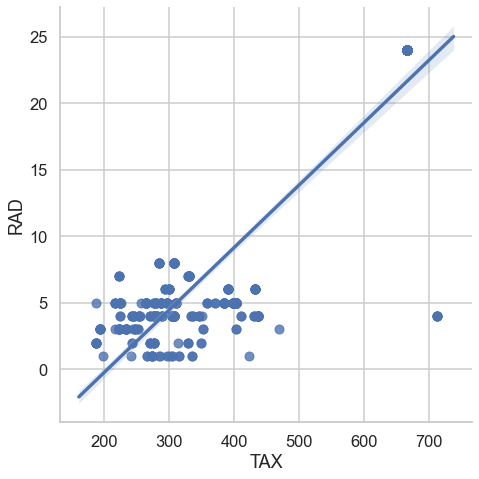

In [34]:
sns.lmplot(x='TAX',y='RAD',data=data,height=7)
plt.show()

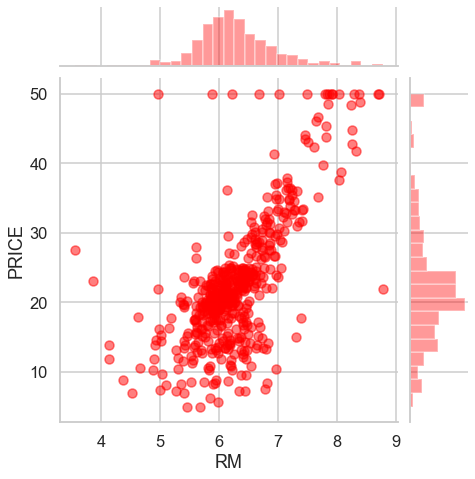

In [35]:
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.jointplot(data['RM'], data['PRICE'], color='red',height=7, joint_kws={'alpha':0.5},)




plt.show()

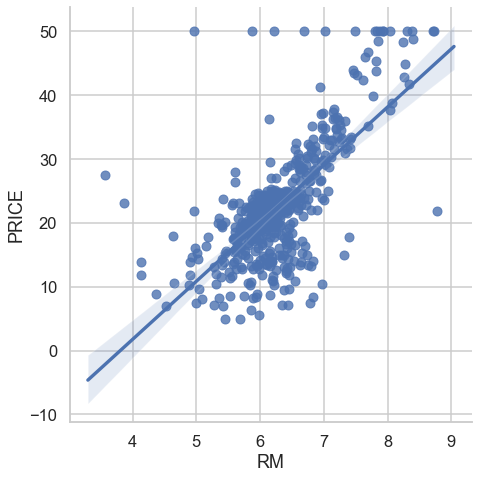

In [36]:
sns.lmplot(x='RM',y= 'PRICE',data=data,height=7)
plt.show()

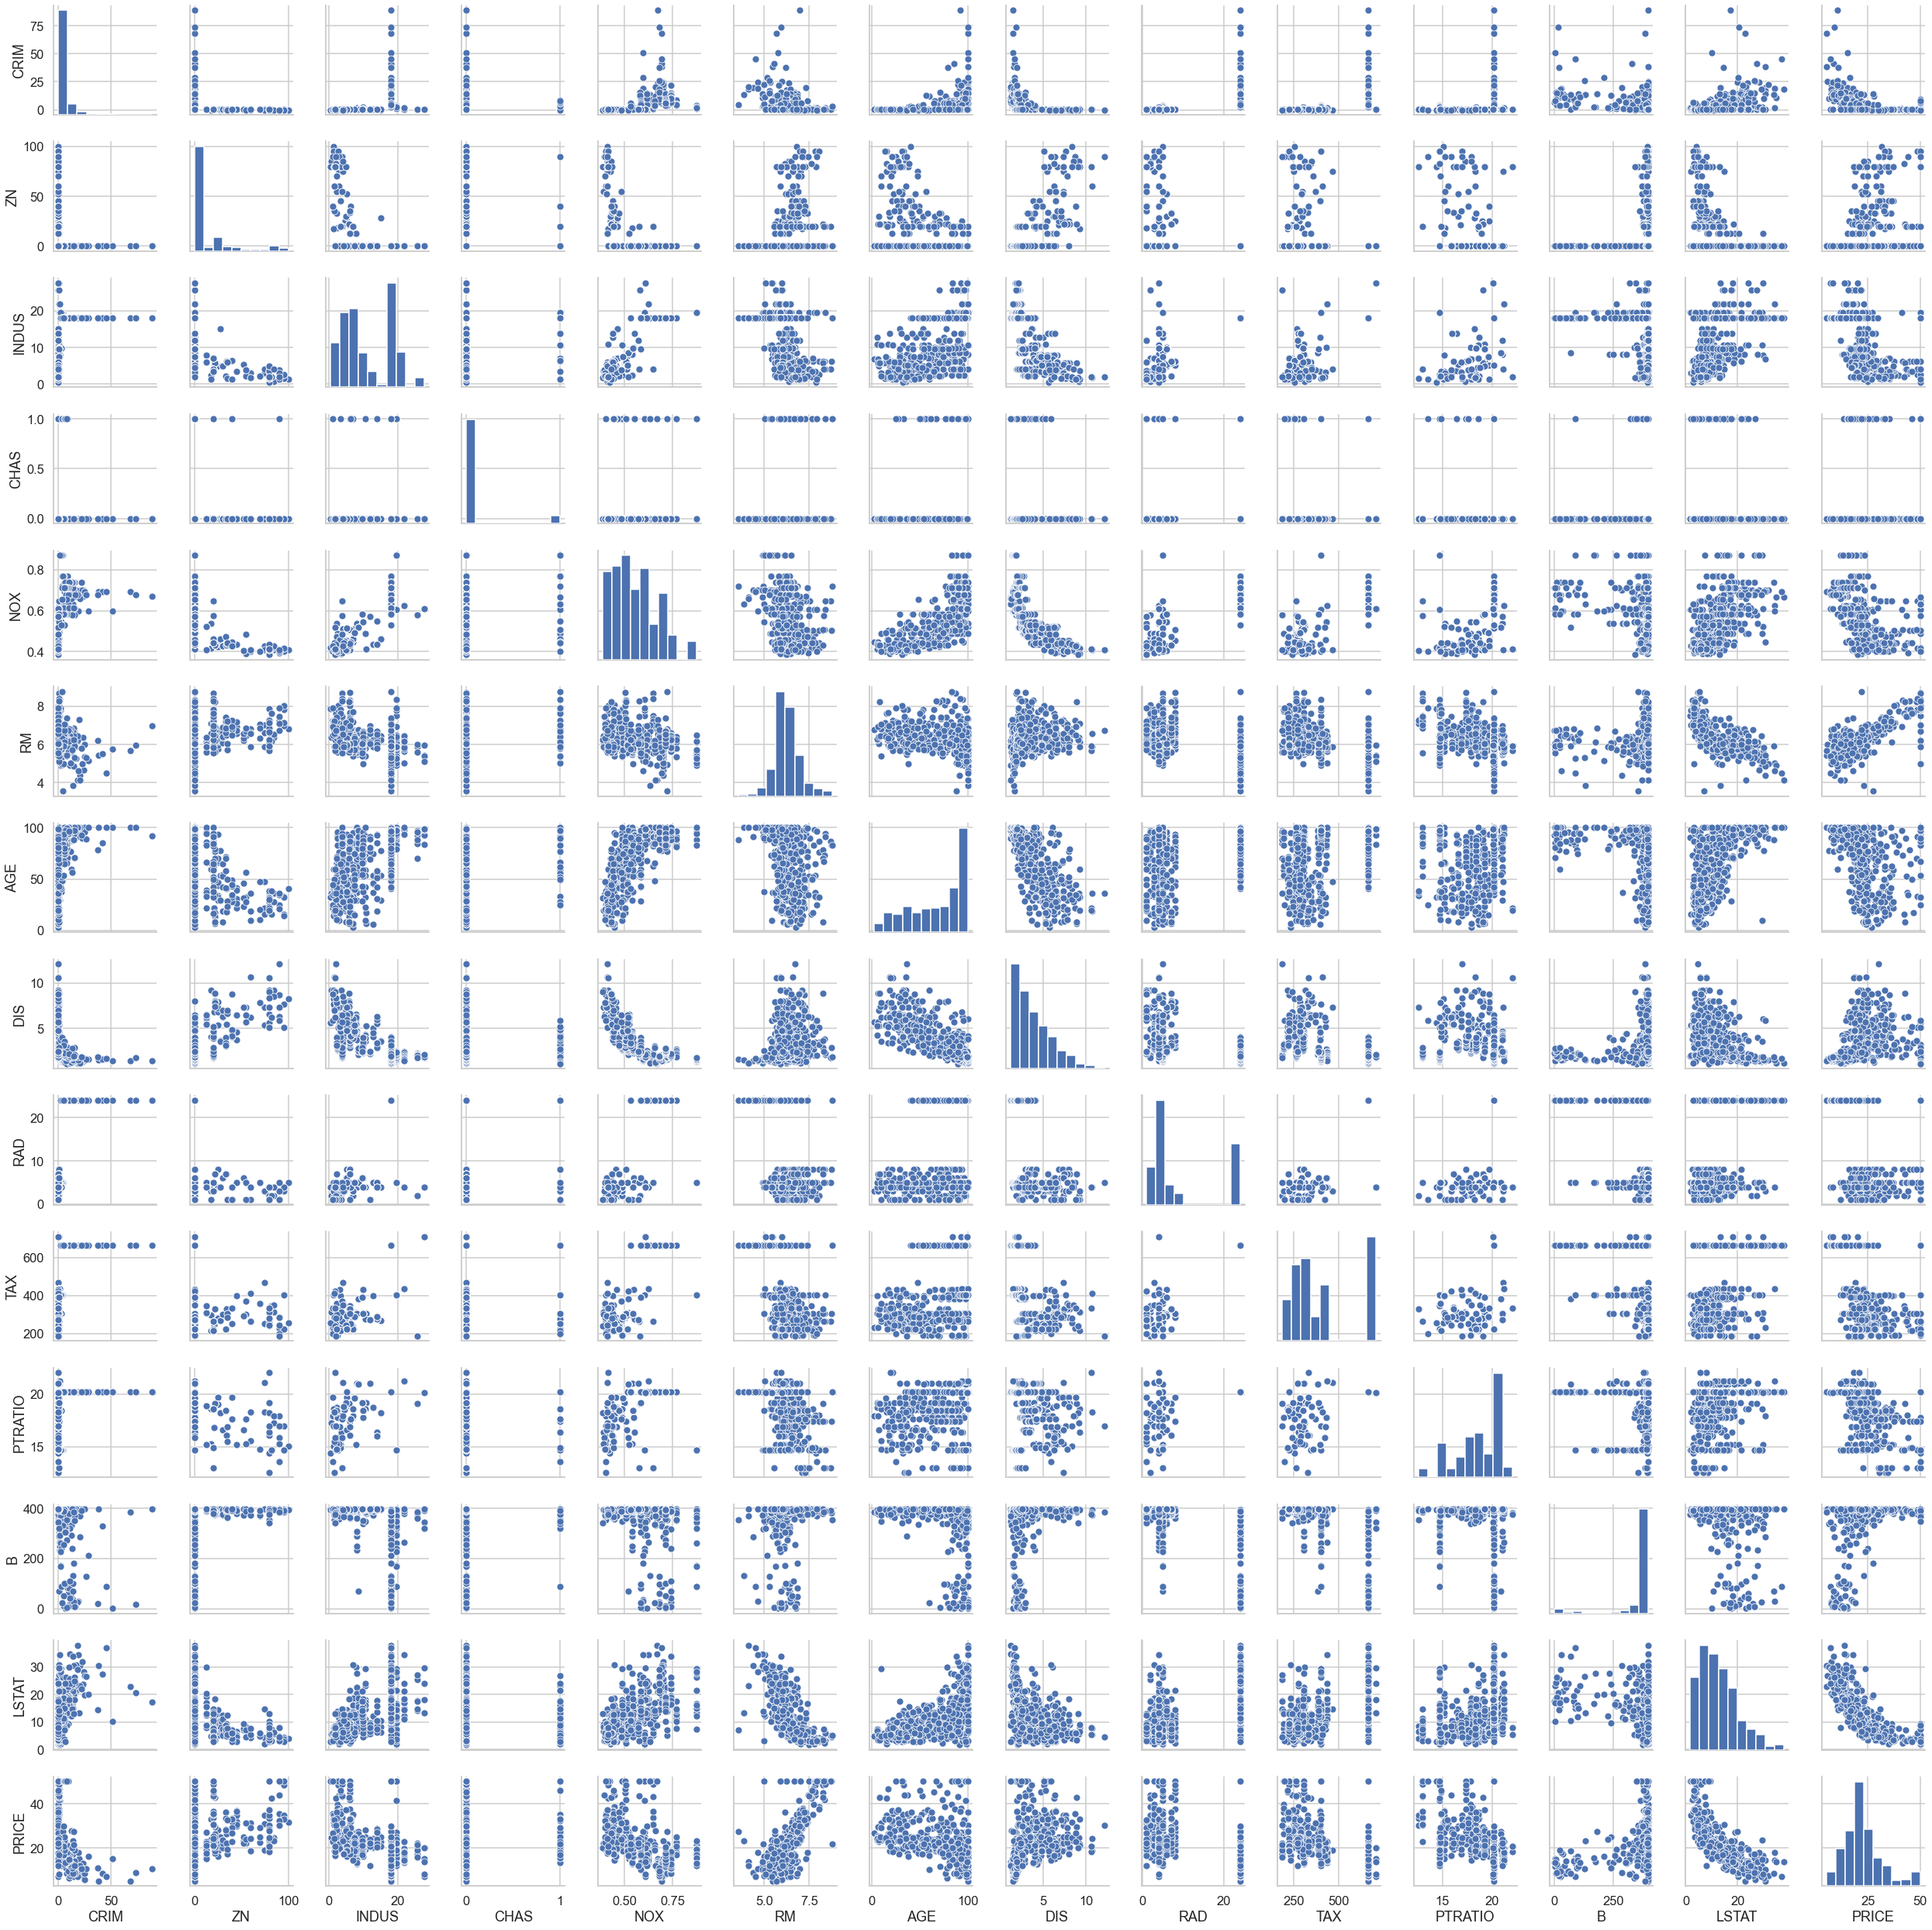

Wall time: 52.3 s


In [37]:
%%time
sns.pairplot(data)
plt.show()

In [38]:
# %%time
# sns.pairplot(data, kind='reg',plot_kws={'line_kws':{'color':'cyan'}})
# plt.show()

## Training & Test Dataset Split

In [39]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                   test_size=0.2, random_state=10)



## Multivariable Regression

In [40]:
reg = LinearRegression()
reg.fit(X_train, y_train)

#r-squaring
print('Training data r-squared:', reg.score(X_train, y_train))
print('Test data r-squared:', reg.score(X_test, y_test))

print('Intercept', reg.intercept_)
pd.DataFrame(data=reg.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115628
Intercept 36.53305138282439


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


# Data Transformation

In [41]:
data['PRICE'].skew()

1.1080984082549072

In [42]:
y_log = np.log(data['PRICE'])
y_log.head()
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [43]:
y_log.skew()

-0.33032129530987864

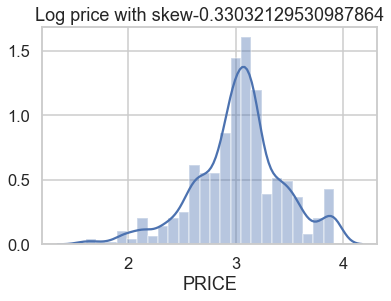

In [44]:
sns.distplot(y_log)
plt.title(f'Log price with skew{y_log.skew()}')
plt.show()

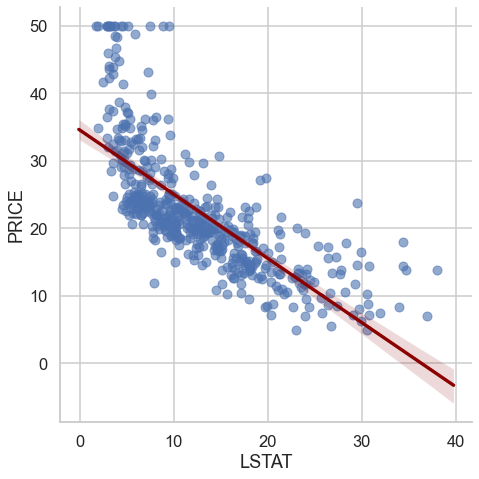

In [45]:
sns.lmplot(x= 'LSTAT', y='PRICE', data = data, height=7, 
           scatter_kws={'alpha': 0.6,}, line_kws={'color':'darkred'})
plt.show()

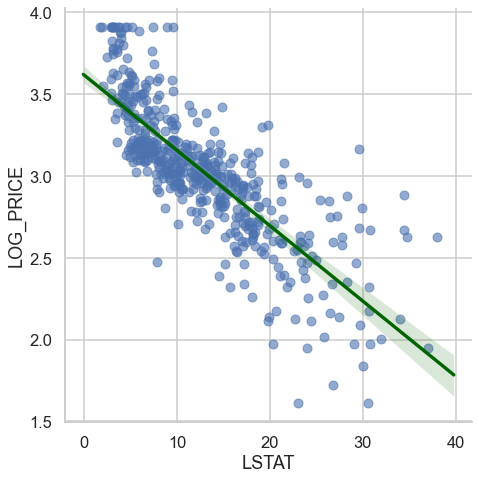

In [46]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log


sns.lmplot(x='LSTAT', y='LOG_PRICE', data = transformed_data, height=7, 
           scatter_kws={'alpha': 0.6,}, line_kws={'color':'darkgreen'})
plt.show()

## Regression using log price

In [47]:
prices = np.log(data['PRICE'])
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                   test_size=0.2, random_state=10)

reg = LinearRegression()
reg.fit(X_train, y_train)

#r-squaring
print('Training data r-squared:', reg.score(X_train, y_train))
print('Test data r-squared:', reg.score(X_test, y_test))

print('Intercept', reg.intercept_)
pd.DataFrame(data=reg.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.7930234826697583
Test data r-squared: 0.7446922306260724
Intercept 4.05994387177519


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


## p values & Evaluating Coefficients

In [48]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)  #Ordinary Least Square
results = model.fit()

#results.params
#results.pvalues

pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues,3)})

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,coef,p-values
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Testing for Multicollinearity

$$ TAX = \alpha_0 + \alpha_1RM + \alpha_2NOX+...+\alpha_{12}LSTAT $$
$$ VIF_{TAX} = \frac{1}{(1-R_{TAX}^2)} $$

In [49]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)

1.7145250443932485

In [50]:
for i in range(len(X_incl_const.columns)):
    print(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
    

597.5487126763895
1.7145250443932485
2.3328224265597584
3.943448822674636
1.0788133385000578
4.410320817897635
1.8404053075678568
3.3267660823099408
4.222923410477865
7.314299817005058
8.508856493040817
1.839911632651406
1.3386713255364715
2.812544292793034


In [51]:
vif =[]
for i in range(len(X_incl_const.columns)):
    vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))

pd.DataFrame({'coef_name': X_incl_const.columns,'vif':np.around(vif,2)})

,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


## Model Simplification &Baysian Info Criterion

In [52]:
# Original model with log prices and all features
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)  #Ordinary Least Square
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues,3)})

print(results.bic) 
print(results.rsquared)

-139.74997769478875
0.7930234826697582


In [53]:
# Reduced  model #1 excluding INDUS
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis=1)


model = sm.OLS(y_train, X_incl_const)  #Ordinary Least Square
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues,3)})

print(results.bic)
print(results.rsquared)

-145.14508855591163
0.7927126289415163


In [54]:
# Reduced  model #2 excluding AGE
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['AGE'], axis=1)


model = sm.OLS(y_train, X_incl_const)  #Ordinary Least Square
results = model.fit()

coef_minus_age = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues,3)})

print(results.bic)
print(results.rsquared)

-144.1155419931336
0.7921837077552986


In [55]:
# Reduced  model #2 excluding AGE, INDUS
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['AGE', 'INDUS'], axis=1)


model = sm.OLS(y_train, X_incl_const)  #Ordinary Least Square
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues,3)})

print(results.bic)
print(results.rsquared)

-149.49934294224656
0.7918657661852815


## Residuals & Residual Plots 

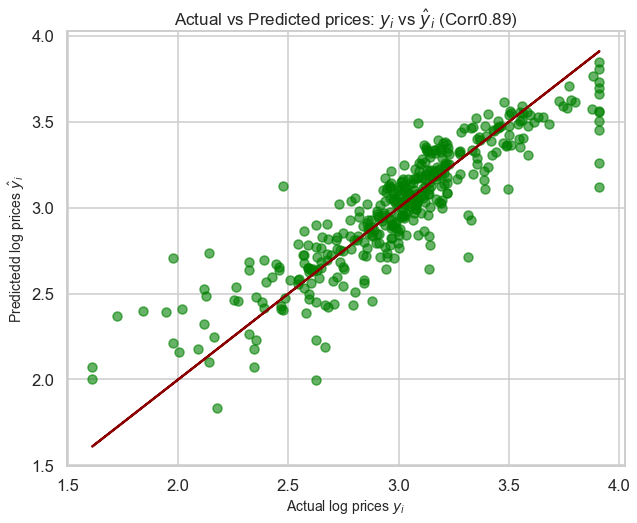

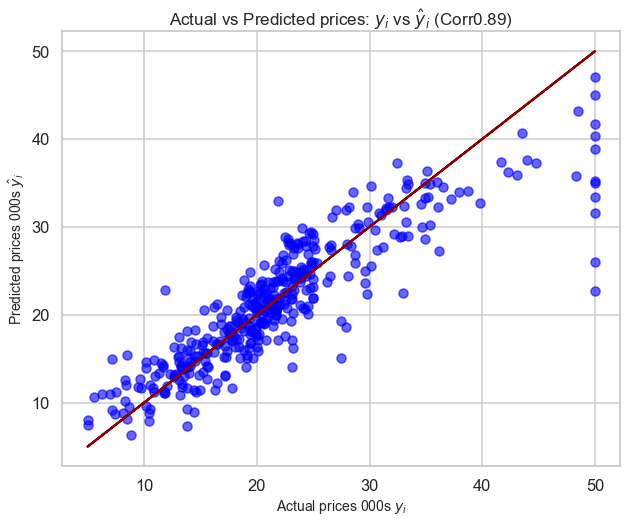

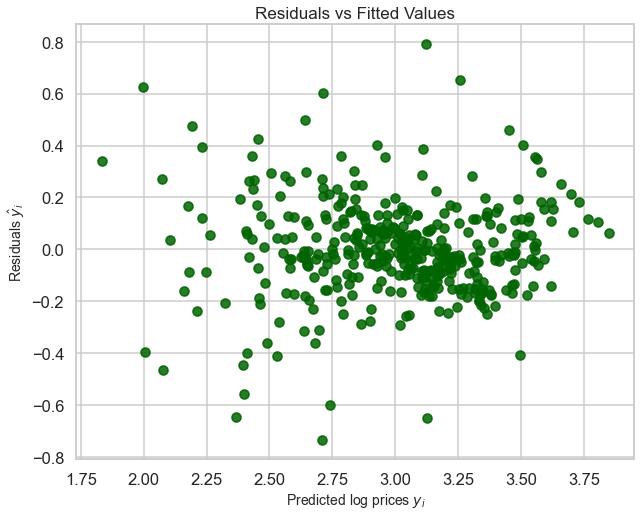

In [56]:
# Modified model: transformed (using log prices) & simplified(dropping two features)
prices = np.log(data['PRICE'])
features = data.drop(['PRICE','INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                   test_size=0.2, random_state=10)

# Using Statsmodel
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)  #Ordinary Least Square
results = model.fit()

#Residuals
# residuals = y_train - results.fittedvalues
#results.resid

# Graph of Actual vs Predicted Prices
corr = round(y_train.corr(results.fittedvalues),2)
plt.figure(figsize=(10,8))
plt.scatter(y_train, results.fittedvalues, c='green', alpha=0.6)
plt.plot(y_train,y_train, c='darkred')

plt.xlabel('Actual log prices $ y_i$', fontsize=14)
plt.ylabel('Predictedd log prices $ \hat y_i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y_i$ vs $\hat y_i$ (Corr{corr})', fontsize=17)


corr = round(y_train.corr(results.fittedvalues),2)
plt.figure(figsize=(10,8))
plt.scatter(np.e**y_train, np.e**results.fittedvalues, c='blue', alpha=0.6)
plt.plot(np.e**y_train,np.e**y_train, c='darkred')

plt.xlabel('Actual prices 000s $ y_i$', fontsize=14)
plt.ylabel('Predicted prices 000s $ \hat y_i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y_i$ vs $\hat y_i$ (Corr{corr})', fontsize=17)
plt.show()

# Residuals vs Predicted values
plt.figure(figsize=(10,8))
plt.scatter(results.fittedvalues, results.resid, c='darkgreen', alpha=0.6)


plt.xlabel('Predicted log prices $ y_i$', fontsize=14)
plt.ylabel('Residuals $ \hat y_i$', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.scatter(results.fittedvalues, results.resid, c='darkgreen', alpha=0.6)

plt.show()

# Mean Squared Error & r-squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_rsquared = round(results.rsquared, 3)


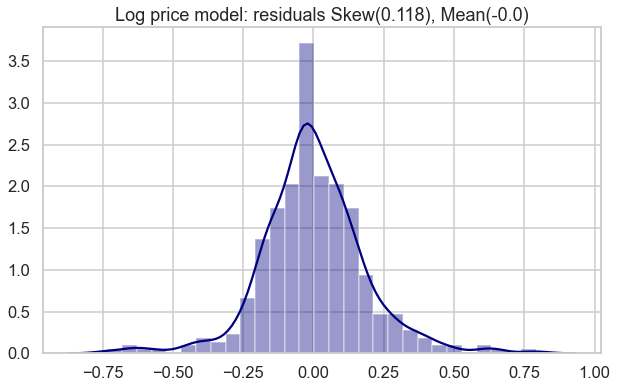

In [57]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(),3)
resid_skew = round(results.resid.skew(),3)

plt.figure(figsize=(10,6))
sns.distplot(results.resid, color = 'navy')
plt.title(f'Log price model: residuals Skew({resid_skew}), Mean({resid_mean})')
plt.show()

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


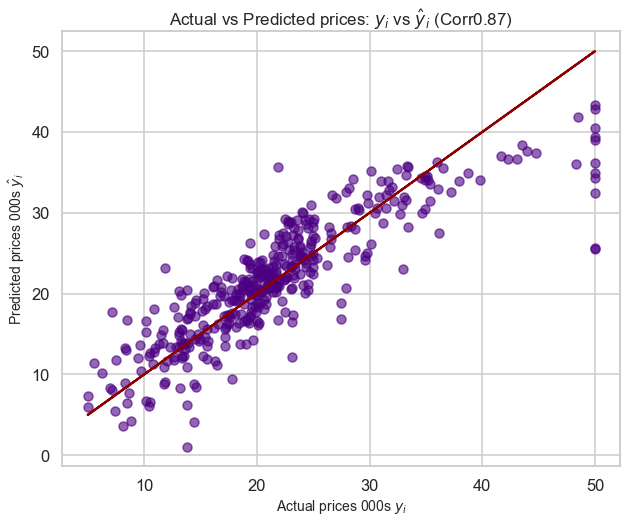

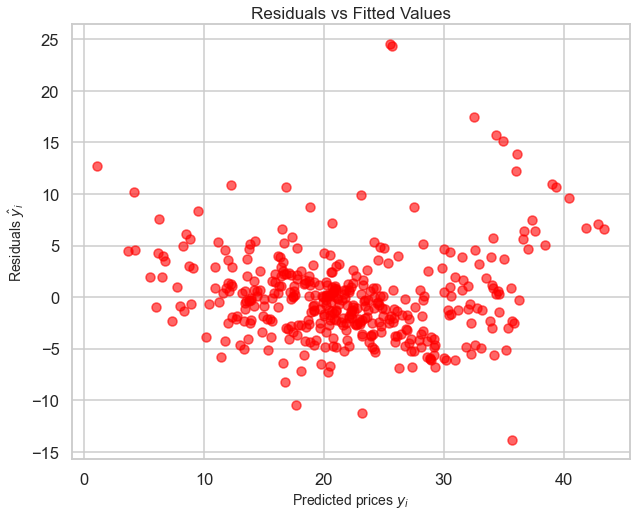

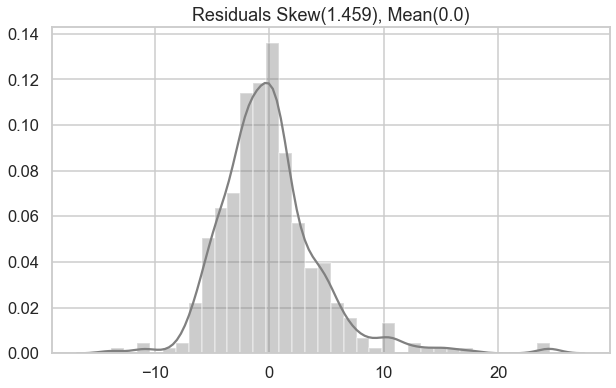

In [58]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                   test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)  #Ordinary Least Square
results = model.fit()


corr = round(y_train.corr(results.fittedvalues),2)
plt.figure(figsize=(10,8))
plt.scatter(y_train, results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(y_train,y_train, c='darkred')

plt.xlabel('Actual prices 000s $ y_i$', fontsize=14)
plt.ylabel('Predicted prices 000s $ \hat y_i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y_i$ vs $\hat y_i$ (Corr{corr})', fontsize=17)
plt.show()


plt.figure(figsize=(10,8))
plt.scatter(results.fittedvalues, results.resid, c='red', alpha=0.6)


plt.xlabel('Predicted prices $ y_i$', fontsize=14)
plt.ylabel('Residuals $ \hat y_i$', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(),3)
resid_skew = round(results.resid.skew(),3)

plt.figure(figsize=(10,6))
sns.distplot(results.resid, color = 'grey')
plt.title(f'Residuals Skew({resid_skew}), Mean({resid_mean})')
plt.show()

# Mean Squared Error & r-squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


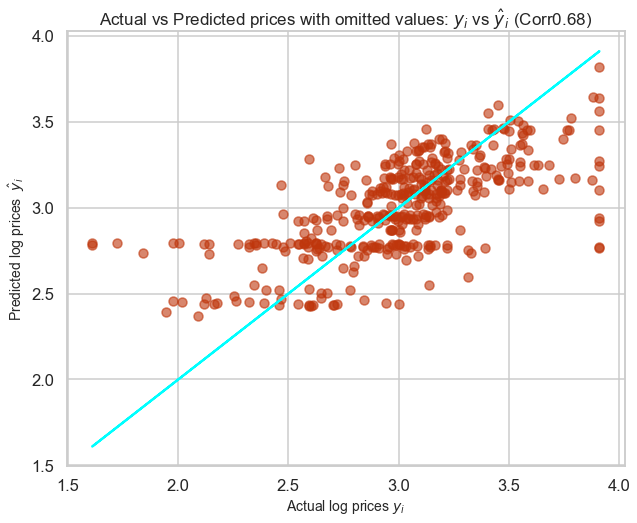

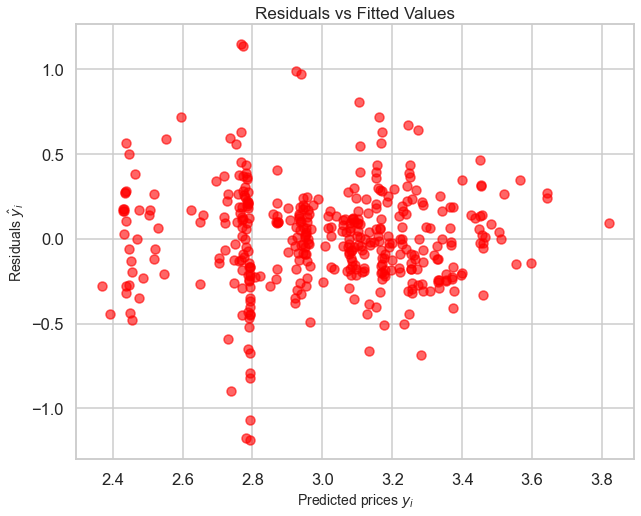

In [59]:
# Model with ommited values

prices = np.log(data['PRICE'])
features = data.drop(['PRICE','INDUS', 'AGE', 'LSTAT','RM','NOX','CRIM'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                   test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)  #Ordinary Least Square
results = model.fit()


corr = round(y_train.corr(results.fittedvalues),2)
plt.figure(figsize=(10,8))
plt.scatter(y_train, results.fittedvalues, c='#bf360c', alpha=0.6)
plt.plot(y_train,y_train, c='cyan')

plt.xlabel('Actual log prices $ y_i$', fontsize=14)
plt.ylabel('Predicted log prices  $ \hat y_i$', fontsize=14)
plt.title(f'Actual vs Predicted prices with omitted values: $y_i$ vs $\hat y_i$ (Corr{corr})', fontsize=17)
plt.show()


plt.figure(figsize=(10,8))
plt.scatter(results.fittedvalues, results.resid, c='red', alpha=0.6)


plt.xlabel('Predicted prices $ y_i$', fontsize=14)
plt.ylabel('Residuals $ \hat y_i$', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Mean Squared Error & r-squared
omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)

In [60]:
pd.DataFrame({'R-Squared':[reduced_rsquared,full_normal_rsquared,omitted_var_rsquared],
             'MSE':[reduced_log_mse,full_normal_mse, omitted_var_mse]},
            index=['Reduced Log','Full Normal Price Model', 'Omitted Var Model'])

,R-Squared,MSE
Reduced Log,0.792,0.035
Full Normal Price Model,0.750,19.921
Omitted Var Model,0.460,0.090
